In [1]:
import warnings
# Disable all warnings
warnings.filterwarnings("ignore")

# load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# OVERVIEW OF THE DATA: Exploring Global Suicide Trends

Welcome to my data science project examining suicide rates across 117 countries worldwide from 1990 to 2022, based on data downloaded from Kaggle. This project aims to shed light on the complex issue of suicide and identify underlying trends and patterns through comprehensive analysis.

# Dataset Overview:
- The dataset encompasses a wide range of information on suicides, including demographic factors, socio-economic indicators, employment rate and geographic details across different regions.
- With data spanning over three decades and covering numerous countries, this dataset offers a rich source of insights into the global landscape of suicide.

# Project Objectives:
1.  Exploratory DataAnalysis (EDA)': Through thorough EDA, we'll delve into the dataset to uncover key trends, patterns, and correlations. We'll explore factors such as age, gender, socio-economic status, and time trends to gain a comprehensive understanding of suicide dynamics globally.
   
2. Clustering Techniques: Utilizing advanced clustering techniques, we aim to identify distinct groups or clusters within the dataset based on shared characteristics. By clustering countries or regions based on suicide rates and associated factors, we can reveal hidden insights and patterns that may inform targeted interventions and policy decisions.

# Expected Outcomes:
- By the end of this project, we anticipate gaining valuable insights into the factors influencing suicide rates globally, including socio-economic disparities, cultural factors, and mental health considerations.
- Through visualization and statistical analysis, we aim to present compelling evidence and actionable insights that may contribute to suicide prevention efforts and public health initiatives worldwide.

# Next Steps:
- Our journey begins with comprehensive data exploration, followed by the application of advanced analytics techniques to extract meaningful insights.


The data used for this project provides information about the suicide rates in several countries between 1990-2022 given some socio-econmic information about ountry.

In [2]:
df = pd.read_csv('/data_sets/suicide_rate.csv')
df.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,Percentage_of_cause-specific_deaths,Std_DeathRate,DeathRatePer100K,Population,GDP,GDP_Per_Capita,GNI,GNI_Per_Capita,Inflation_Rate,Employment_ratio_of_population
0,EU,Europe,ALB,Albania,1992.0,Male,33.0,0.331959,2.335802,2.076386,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992.0,Female,14.0,0.191860,0.866420,0.874563,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1993.0,Male,46.0,0.477724,3.330938,2.937233,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
3,EU,Europe,ALB,Albania,1993.0,Female,27.0,0.385164,1.755077,1.686025,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
4,EU,Europe,ALB,Albania,1994.0,Male,37.0,0.419406,2.678796,2.332619,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086


In [3]:
# Shape of the data
df.shape

(5928, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5928 entries, 0 to 5927
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   RegionCode                           5928 non-null   object 
 1   RegionName                           5928 non-null   object 
 2   CountryCode                          5928 non-null   object 
 3   CountryName                          5928 non-null   object 
 4   Year                                 5872 non-null   float64
 5   Sex                                  5872 non-null   object 
 6   SuicideCount                         5872 non-null   float64
 7   Percentage_of_cause-specific_deaths  5871 non-null   float64
 8   Std_DeathRate                        5664 non-null   float64
 9   DeathRatePer100K                     5664 non-null   float64
 10  Population                           5578 non-null   float64
 11  GDP                           

# Columns 
1. RegionCode --- is the code or abbreviation of the region or continent
2. RegionName ---- is the name of the region in full
3. CountryCode --- represents a short abbreviation for the country 
4. CountryName --- The name of the country 
5. Year -- Is the year the data was taken
6. Sex -- Male or Female
7. SuicideCount --- Is the number of suicide recorded in a given year 
8. Percentage_of_cause-spacific_deaths --- Is the percentage of death rates that have specific causes 
9. Std_DeathRate -- standardized form of death rates
10.  DeathRatePer100K -- Number of deaths that occured for every 100 thousand people.
11. Population -- Is the total number of people living in a region
12. GDP --- Gross Domestic Product
13. GDP_Per_Capita --- an economic metric that breaks down a country's economic output per person allocation 
14. GNI -- Gross National Income
15. GNI_Per_Capita -- Gross National Income Per Person 
14. Inflation_Rate -- Is the rate of increase in price or cost of living that year.
15. Employment_ratio_of_population  --- Is the number of people employed as a percentage ofthe total working-age population.

In [5]:
# df.isnull().sum()
# it was discovered fron the initial dataset that most of the columns has a lot of null values will be problematic 
# if handled manually

In [6]:
# a large proportion of the data has null values, it goes up to 13% of null values in a single column
# Let's treat the null values
# % of null values in df 
percentage_missing_values = (df.isnull().sum() / len(df)) * 100
percentage_missing_values

RegionCode                              0.000000
RegionName                              0.000000
CountryCode                             0.000000
CountryName                             0.000000
Year                                    0.944669
Sex                                     0.944669
SuicideCount                            0.944669
Percentage_of_cause-specific_deaths     0.961538
Std_DeathRate                           4.453441
DeathRatePer100K                        4.453441
Population                              5.904184
GDP                                     7.017544
GDP_Per_Capita                          7.017544
GNI                                     9.311741
GNI_Per_Capita                          9.986505
Inflation_Rate                         13.107287
Employment_ratio_of_population         10.290148
dtype: float64

In [7]:
df.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,Percentage_of_cause-specific_deaths,Std_DeathRate,DeathRatePer100K,Population,GDP,GDP_Per_Capita,GNI,GNI_Per_Capita,Inflation_Rate,Employment_ratio_of_population
0,EU,Europe,ALB,Albania,1992.0,Male,33.0,0.331959,2.335802,2.076386,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992.0,Female,14.0,0.191860,0.866420,0.874563,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1993.0,Male,46.0,0.477724,3.330938,2.937233,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
3,EU,Europe,ALB,Albania,1993.0,Female,27.0,0.385164,1.755077,1.686025,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
4,EU,Europe,ALB,Albania,1994.0,Male,37.0,0.419406,2.678796,2.332619,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086


In [8]:
# i will use the KNN imputer in sklearn which which automatically fill the null values
# df['Sex'] contains an undefine value that we can replace with the mode of the column 
mode_sex = df['Sex'].mode()[0]
df['Sex'] = df['Sex'].replace({ 'Unknown' : mode_sex}) 

In [9]:
# different columns to apply separate strategy to

# fill the missing values with median of each column
strategy_median = df[['SuicideCount', 'Percentage_of_cause-specific_deaths', 'Std_DeathRate', 'DeathRatePer100K', 'Population', 'GDP', 'GDP_Per_Capita',
                    'GNI', 'GNI_Per_Capita', 'Inflation_Rate', 'Employment_ratio_of_population']]

# categorical data with missing values
strategy_mode = df[['Year', 'Sex']] # fill null values with the most frequently occuring

In [10]:
# Instantiate each imputer with different strategies
imputer_strategy_median = SimpleImputer(strategy = 'median')
imputer_strategy_mode = SimpleImputer(strategy = 'most_frequent')


# Fitting each imputer on the required columns
fill_median = imputer_strategy_median.fit_transform(strategy_median)
fill_mode = imputer_strategy_mode.fit_transform(strategy_mode)

In [11]:
# df_median is a dataframe with null values filled with median of the column, while df_mode is the represents dataframe which 
# null values has been replaced with the most frequent values (mode)

df_median = pd.DataFrame(fill_median, columns= strategy_median.columns)
df_mode = pd.DataFrame(fill_mode, columns = strategy_mode.columns)

# We combine this transformed columns then recombine with the initial columns without null values

df_combined = pd.concat([df_median, df_mode], axis=1)

# initial column without null values
clean_columns = df[['RegionCode', 'RegionName', 'CountryCode', 'CountryName']]

# Combine both transformed and clean columns
df_new = pd.concat([df_combined, clean_columns], axis=1)

# this is new dataframe 
df_new.head()

,SuicideCount,Percentage_of_cause-specific_deaths,Std_DeathRate,DeathRatePer100K,Population,GDP,GDP_Per_Capita,GNI,GNI_Per_Capita,Inflation_Rate,Employment_ratio_of_population,Year,Sex,RegionCode,RegionName,CountryCode,CountryName
0,33.0,0.331959,2.335802,2.076386,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315,1992.0,Male,EU,Europe,ALB,Albania
1,14.0,0.191860,0.866420,0.874563,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315,1992.0,Female,EU,Europe,ALB,Albania
2,46.0,0.477724,3.330938,2.937233,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798,1993.0,Male,EU,Europe,ALB,Albania
3,27.0,0.385164,1.755077,1.686025,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798,1993.0,Female,EU,Europe,ALB,Albania
4,37.0,0.419406,2.678796,2.332619,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086,1994.0,Male,EU,Europe,ALB,Albania


In [12]:
df_new.isnull().sum()

SuicideCount                           0
Percentage_of_cause-specific_deaths    0
Std_DeathRate                          0
DeathRatePer100K                       0
Population                             0
GDP                                    0
GDP_Per_Capita                         0
GNI                                    0
GNI_Per_Capita                         0
Inflation_Rate                         0
Employment_ratio_of_population         0
Year                                   0
Sex                                    0
RegionCode                             0
RegionName                             0
CountryCode                            0
CountryName                            0
dtype: int64

In [13]:
# some columns  have wrong data types, let's give them that appropriate data types
df_new['Year'] = df_new['Year'].astype('int')
df_new['SuicideCount'] = df_new['SuicideCount'].astype('int')
df_new['Population'] = df_new['Population'].astype('int')
df_new['GDP'] = df_new['GDP'].astype('int')
df_new['Sex'] = df_new['Sex'].astype('category')

In [14]:
df_new.dtypes

SuicideCount                              int32
Percentage_of_cause-specific_deaths     float64
Std_DeathRate                           float64
DeathRatePer100K                        float64
Population                                int32
GDP                                       int32
GDP_Per_Capita                          float64
GNI                                     float64
GNI_Per_Capita                          float64
Inflation_Rate                          float64
Employment_ratio_of_population          float64
Year                                      int32
Sex                                    category
RegionCode                               object
RegionName                               object
CountryCode                              object
CountryName                              object
dtype: object

In [15]:
df_new.shape

(5928, 17)

In [16]:
df_new.describe()

,SuicideCount,Percentage_of_cause-specific_deaths,Std_DeathRate,DeathRatePer100K,Population,GDP,GDP_Per_Capita,GNI,GNI_Per_Capita,Inflation_Rate,Employment_ratio_of_population,Year
count,5928.000000,5928.000000,5928.000000,5928.000000,5.928000e+03,5.928000e+03,5928.000000,5.928000e+03,5928.000000,5928.000000,5928.000000,5928.000000
mean,1265.501181,1.249741,9.470719,10.484872,2.368332e+07,-1.827705e+09,16760.948440,4.593691e+11,21383.441296,18.182493,55.743462,2005.792004
std,3887.844294,1.183032,10.544921,11.572376,4.433527e+07,9.656193e+08,18790.488871,1.621281e+12,17983.851931,152.946370,7.743715,8.713273
min,0.000000,0.000000,0.000000,0.000000,4.054200e+04,-2.147484e+09,60.235121,2.082832e+08,780.000000,-10.630097,32.026000,1990.000000
25%,30.000000,0.431141,2.667127,2.862977,2.836412e+06,-2.147484e+09,4123.506487,1.318667e+10,9222.500000,1.733830,51.475000,1999.000000
50%,219.000000,0.872211,5.971800,6.721382,6.930100e+06,-2.147484e+09,9521.263850,5.834463e+10,15995.000000,3.041363,55.957000,2006.000000
75%,835.250000,1.830730,12.480366,13.589848,2.248087e+07,-2.147484e+09,23496.367680,2.660000e+11,27680.000000,5.678594,59.928250,2013.000000
max,51464.000000,16.666667,80.261488,83.522190,3.320316e+08,2.125126e+09,133711.794400,2.370000e+13,152630.000000,4734.914347,87.518000,2022.000000


In [17]:
# Number of countries
unique_country = df_new['CountryName'].nunique()
print('There are', unique_country, 'countries in the dataset')

There are 117 countries in the dataset


In [18]:
df_new['RegionCode'].value_counts()

RegionCode
EU     2257
AS     1290
CSA    1111
NAC     883
AF      247
OA      140
Name: count, dtype: int64

In [19]:
# Number of countries
df_new['CountryName'].nunique()

117

In [20]:
df_new['Sex'].value_counts()

Sex
Female    3040
Male      2888
Name: count, dtype: int64

Text(0.5, 1.0, 'Countplot for Males and Females')

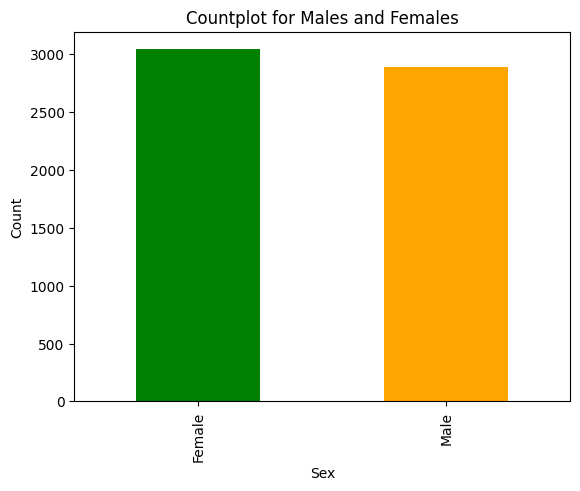

In [21]:
# to create count plot for df_new['Sex']
count_sex = df_new['Sex'].value_counts()
# to apply custom colors
custom_colors = ['green', 'orange']
count_sex.plot(kind = 'bar', color = custom_colors)
plt.ylabel('Count')
plt.xlabel('Sex')
plt.title('Countplot for Males and Females')

In [22]:
# Number of male and female victimes in each region
group_by_sex = df_new.groupby(['RegionName', 'Sex']).size().unstack(fill_value=0)
group_by_sex

Sex,Female,Male
RegionName,,
Africa,129,118
Asia,675,615
Central and South America,592,519
Europe,1129,1128
North America and the Caribbean,445,438
Oceania,70,70


We can see the numberof males and females in each region who are victims of suicide. Europe has the highest with 1129 males and 1128 females.

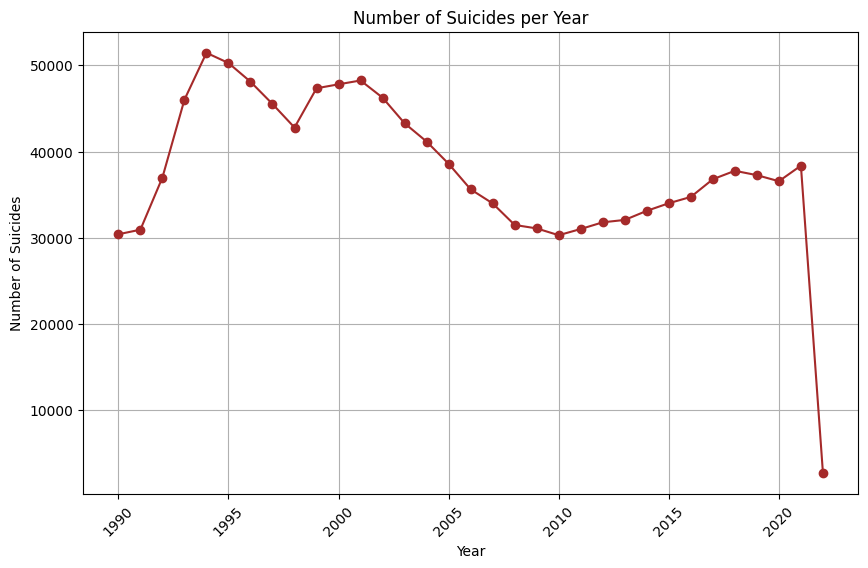

In [23]:
# Creating a line plot to visualize the numnber of suicides each year from 1990 - 2022
suicide_by_year = df_new.groupby('Year')['SuicideCount'].max()
plt.figure(figsize=(10, 6))
plt.plot(suicide_by_year.index, suicide_by_year.values, marker='o', color='brown', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.title('Number of Suicides per Year')
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid lines for better visualization
plt.show()

We can see an increase in the total  number of suicides, from 30,000 to a litle over 50,000 between 1990 and 1994. There is a steep decrease in the number of suicides in 2022.

In [24]:
# Year with the highest number of suicides
suicide_by_year = df_new.groupby('Year')['SuicideCount'].max()
year_with_highest_suicides = suicide_by_year.idxmax()
print("Year with the highest number of suicides:", year_with_highest_suicides)

Year with the highest number of suicides: 1994


Text(0.5, 1.0, 'Distribution of Employment ratio of the population')

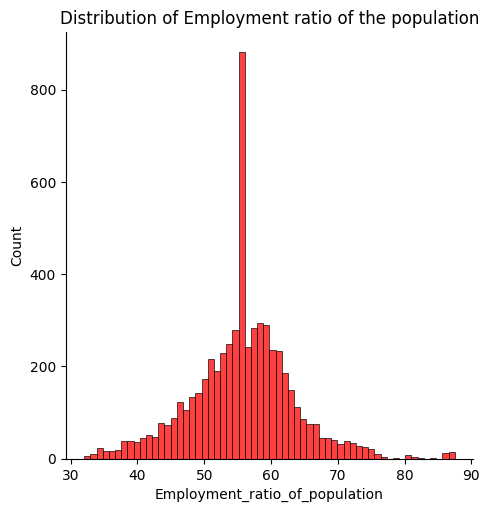

In [25]:
# distribution of employment ratio
sns.displot(x = 'Employment_ratio_of_population', data = df_new, color = 'red')
plt.title('Distribution of Employment ratio of the population')

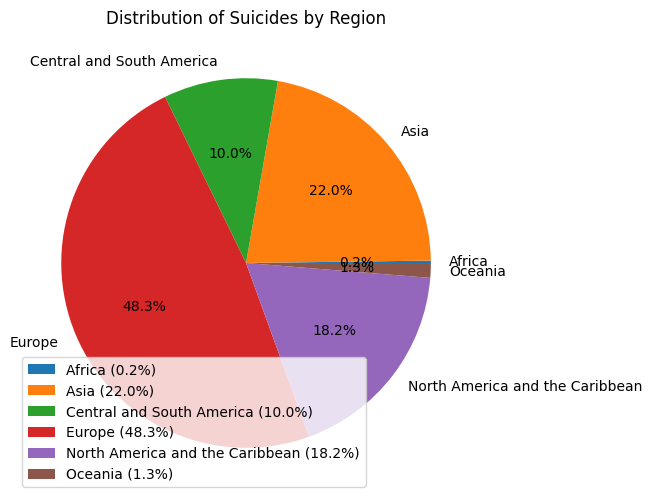

In [26]:
# Let me use a pie chart to visulaize the percentge of suicides in each region

# Calculate the sum of suicides in each region
suicide_sum_by_region = df_new.groupby('RegionName')['SuicideCount'].sum()

# Plotting a pie chart
plt.figure(figsize=(10, 6))
patches, texts, autotexts = plt.pie(x=suicide_sum_by_region.values, labels=suicide_sum_by_region.index, autopct='%1.1f%%')

#  To adjust the layout to make all percentage markers visible
for autotext in autotexts:
    autotext.set_visible(True)

# I'd like to visualize the pie  chart by the percentage of each portion
# Extract percentages from autotexts
percentages = [float(autotext.get_text().strip('%')) for autotext in autotexts]

# Add percentage information to the legend labels
legend_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(suicide_sum_by_region.index, percentages)]

# Add a legend with more information about the percentage proportion of the pie
plt.legend(labels=legend_labels, loc="best")

plt.title('Distribution of Suicides by Region')
plt.ylabel('')
plt.show()

After analyzing the data presented in the pie chart above, it is evident that suicide rates vary significantly across different regions. Africa exhibits the lowest incidence of suicides, accounting for a mere 0.2% of the total, suggesting relatively lower prevalence or reporting of suicidal behavior within the region. Conversely, Europe emerges as the region with the highest suicide rate, representing a staggering 48.3% of the total suicides recorded. This stark contrast underscores the importance of regional disparities in understanding and addressing mental health challenges and highlights the need for targeted interventions and support systems, particularly in regions with higher suicide burdens.

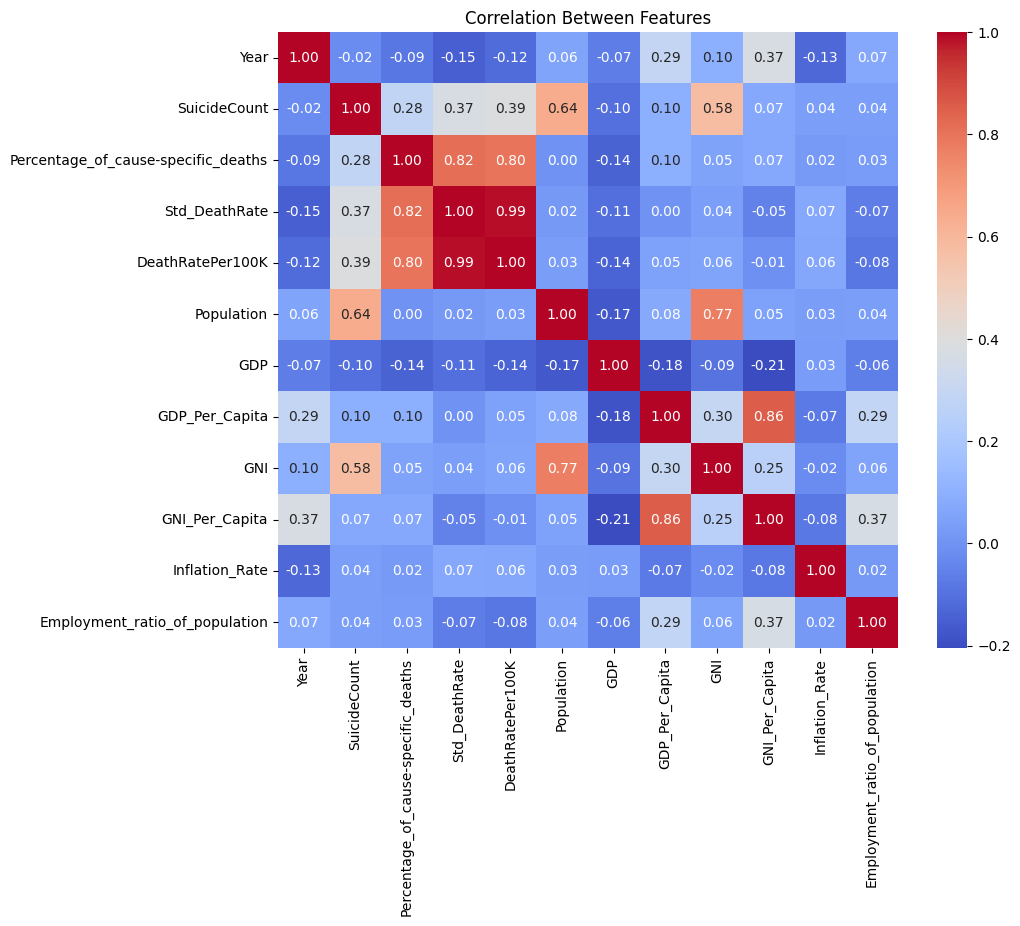

In [27]:
# Visualize the correlation between numerical data
num_data = df_new[['Year','SuicideCount', 'Percentage_of_cause-specific_deaths', 'Std_DeathRate', 'DeathRatePer100K', 'Population', 'GDP', 'GDP_Per_Capita',
                    'GNI', 'GNI_Per_Capita', 'Inflation_Rate', 'Employment_ratio_of_population']]

# create a correlation matrix
correlation_matrix = num_data.corr()
# create a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', annot_kws = {'size': 10})
plt.title('Correlation Between Features')
plt.show()

We can see from the above heatmap that four features have very strong correlation 
1. Std_DeathRate and DeathRatePer100K with correlation coeafficient of 0.99
2. GDP and GNI have correlation coefficient of 1
To handle this, i will remove two of the columns(one from each bearing high correlation), because they are very similar, and would not add information(variability) to our prediction.

In [28]:
# I will drop one feature each from the columns having high correlation
# Std_DeathRate and GNI will be dropped

num_data = num_data.drop(['Std_DeathRate', 'GNI'], axis=1)

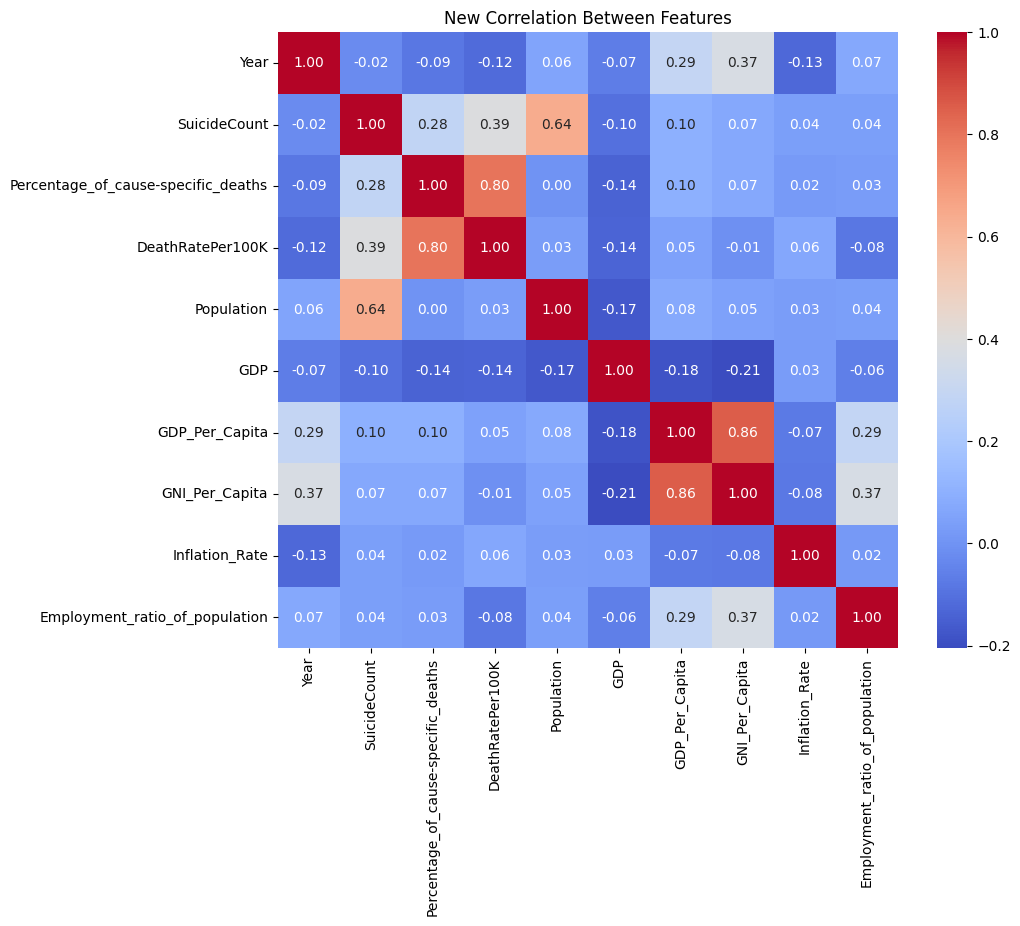

In [29]:
# create a correlation matrix with updated dataset
correlation_matrix = num_data.corr()
# create a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', annot_kws = {'size': 10})
plt.title('New Correlation Between Features')
plt.show()

# PREPROCESSING 

In [30]:
# Transform numerical data
scaler = StandardScaler()
scaled_num = scaler.fit_transform(num_data)

In [31]:
# Using just numeric data
scaled_num = pd.DataFrame(scaled_num, columns=num_data.columns)
scaled_num.head(10)

,Year,SuicideCount,Percentage_of_cause-specific_deaths,DeathRatePer100K,Population,GDP,GDP_Per_Capita,GNI_Per_Capita,Inflation_Rate,Employment_ratio_of_population
0,-1.583006,-0.317041,-0.775854,-0.726661,-0.460988,2.568392,-0.881376,-1.092374,1.358911,-1.346814
1,-1.583006,-0.321928,-0.894288,-0.830523,-0.460988,2.568392,-0.881376,-1.092374,1.358911,-1.346814
2,-1.468229,-0.313697,-0.652631,-0.652267,-0.461433,3.120562,-0.872519,-1.071799,0.436937,-1.026140
3,-1.468229,-0.318584,-0.730877,-0.760396,-0.461433,3.120562,-0.872519,-1.071799,0.436937,-1.026140
4,-1.353452,-0.316012,-0.701930,-0.704517,-0.461879,3.841026,-0.860856,-1.061233,0.028657,-0.730649
5,-1.353452,-0.321671,-0.850695,-0.825876,-0.461879,3.841026,-0.860856,-1.061233,0.028657,-0.730649
6,-1.238675,-0.310867,-0.539023,-0.599725,-0.462324,-0.331192,-0.852117,-1.038433,-0.067933,-0.330291
7,-1.238675,-0.316784,-0.630479,-0.727059,-0.462324,-0.331192,-0.852117,-1.038433,-0.067933,-0.330291
8,-1.123898,-0.311896,-0.600133,-0.624067,-0.462770,-0.331192,-0.838312,-1.019525,-0.035682,-0.349276
9,-1.123898,-0.315497,-0.580667,-0.702945,-0.462770,-0.331192,-0.838312,-1.019525,-0.035682,-0.349276


# KMEANS

In [36]:
# Create an instance of KMeans
kmeans = KMeans(n_clusters=4)  

# Fit KMeans to your data
kmeans.fit(scaled_num)

# cluster centers
canters = kmeans.cluster_centers_

# Get cluster labels
labels = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_num, labels)

# print the score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2926639321731592
